# План лекции:  
> Введение в python:  
> * Задания объектов:
>  * Задание переменных;
>  * Задание функции, 
>  * Задание класса (объекта класса тип).
> * Основные типы. int,float, bool,object, None
> * Типы коллекции:
>   * Изменяемые значения параметров по-умолчанию
>   * list,str суммирование, вычитание, умножение. и т.д
>  * tuple
>  * set
>  * dict
>    * что может быть ключем?
>  * итераторы
>  * collections comprehension’s
>  * генераторы
> * `slice`, `ellipsis`, `filter`, `map`, `lambda` ,т.д.

> * коротко про factory и defaultdict.
> 

> * Циклы, распаковка (*args,**kwargs) и т.д.

> Введение в [Numpy](http://web.mit.edu/dvp/Public/numpybook.pdf):
> * D - мерное мышление
> * форма записи не разреженных массивов\тензоров. Особенности использования памяти. Указание типов.
> * Формы тензоров, shape, `reshape`,(`view`), `contiguous`. 
> * `broadcastable` - свойство.
> * Примеры работы с типами.
> * Маски\индексирование
> * Разреженное индексирование

> Кратко про scipy.  
> Кратко про sk-learn.  
> Кратко про matplotlib.  
> Кратко про seaborn.  

> *Синтаксис и синтаксический сахар.
> * itertools и collections:
>  * OrderedDict еще раз про defaultdict
>  * chain, product. namedtuple


# Введение в python
Почему Python?


> Преимущества:  
  * Скриптовый язык, нет необходимости компилирования;  
  * Быстрое прототипирование, удобство использования, за счет простоты синтаксиса и синтаксического сахара;  
  * Большое число удобных библиотек для обработки данных;  
  * Большое и быстро развивающееся сообщество;
  * **Нестрогая типизация**;  
  * Автоматическое управление памятью, сборщик мусора;  
  * Большое количество API для связывания программных модулей, написанных на разных ЯП.  
  * Наличие развитых MPI.
  * Мультиплатформенность.  

> Недостатки:
  * GIL - использование только 1 интерпретатора на процесс. (синтетический мультипроцессинг, но возможно обходить со стороны системы).
  * Малая скорость работы в real-time.
  * **Нестрогая типизация**;
  * "Всё является объектом" т.е. не совсем оптимальное использование  памяти.
## Задания объектов
В Python всё является объектом.


## Что значит всё является _объектом_?
Функция, класс, модуль, пакет, число, и т.д. `object` - специальный встроенный тип\класс.




### Задания объектов

#### Задание переменных
 

In [ ]:
x = 3
y = 4
z = 3,5
a,b,c = 1,2,3
print(x,y,z)
print(a,b,c)

3 4 (3, 5)
1 2 3


In [ ]:
id(3), id(x)

(94425756990016, 94425756990016)

In [ ]:
b,c,a = a,b,c
b,c,a

(1, 2, 3)

In [ ]:
b = a
c = b
a = c
b,c,a

(3, 3, 3)

In [ ]:
b,a,c = (a,b),a,c
b,a,c

((3, 1), 3, 2)

### Задание функции


In [ ]:
def myfunc(a,b,c, *args, **kwargs):
  return (a^2 + b^2), c*2

Функция может объявлят функцию, т.е декорировать, также класс, и содержать в себе объявление других функций или даже классов.

In [ ]:
myfunc(a,c,[*b])

(5, [3, 1, 3, 1])

In [ ]:
myfunc(a,c,b[0])

(5, 6)

In [ ]:
myfunc, type(myfunc)

(<function __main__.myfunc>, function)

### Задания Класса

In [ ]:
class AverageMeter:


  def __init__(self, name):  # Метод инициализации\объявления экземпляра класса __init__
    self.name = name
    self.val = 0
    self.count = 0
    self._sum = 0  # скрытый атрибут
    self._sqrsum = 0  # скрытый атрибут

  def __call__(self, value):   # Методы __call__ позволяют вызывать объект класса как функцию.
    self.val = value
    self._sum += value
    self._sqrsum += value**2
    self.count += 1
    self.avg = self._sum/self.count
    self.std = (self._sqrsum/self.count - self.avg**2)**0.5
  
  def __repr__(self):   # Методы __repr__ позволяют добавлять текстовое представление классу
    repr = f'{self.name}:'
    for key,value in self.__dict__.items():
       #Вот тут мы например, скрытые атрибуты не пишем
      repr+=f'\t{key}: {value:.4f}' if key[:1]!='_' and key!='name'  else ''
    return repr

  @classmethod
  def from_array(cls, name, array): # Методы класса, позволяют добавить алтернативные объявления экземпляра класса, и многое другое, не зависящее от экземпляра класса
    obj = cls(name)
    for x in array:
      obj(x)
    return obj




In [ ]:
MeanX = AverageMeter('Mean X')
from random import randrange
array = list() # также можно []
for _ in range(1000):
  array_elem = randrange(10)/10
  array.append(array_elem) 
  MeanX(array_elem)
# Можно кароче:
# [MeanX(x) for x in [randrange(10)/10 for i in range(1000)]]
MeanX

Mean X:	val: 0.0000	count: 1000.0000	avg: 0.4581	std: 0.2867

In [ ]:
Alt_MeanX = AverageMeter.from_array("Alternative MeanX",array)
Alt_MeanX

Alternative MeanX:	val: 0.0000	count: 1000.0000	avg: 0.4581	std: 0.2867

In [ ]:
MeanX.__dict__ # В словаре __dict__ хранятся имена атрибутов  экзмепляра класса, им сопоставляются ссылки на значения атрибута экзмепляра.  

{'_sqrsum': 277.49000000000007,
 '_sum': 438.9,
 'avg': 0.43889999999999996,
 'count': 1000,
 'name': 'Mean X',
 'std': 0.2913018880817632,
 'val': 0.1}

In [ ]:
type(AverageMeter), type(MeanX) # все классы наследуются от type, (либо от другого метакласса), а экземпляры уже имеют тип порождающего класса.

(type, __main__.AverageMeter)

Помимо описанных выше специальных методов, существуют методы перегрузки `+` - `__add__` итеративного суммирования `__iadd__` и множество других. 
#### Простые Типы
`bool` - булев тип. Всегда существовать может только 2 таких значения, все остальные - ссылки на на них.  
`int` - целочисленный тип, нет ограничения на размер; все объекты в диапазоне `[-5,256]` имеют готовые индексы в памяти, т.е все объекты ссылающиеся в этот диапазон, занимают одну и ту же область памяти.    
`float` -  число с плавающей точкой, кодируется отношением двух целых величин, т.е кодирует рациональные числа.    
`None` - единственный объект, имеющий свой специальный тип - `NoneType`.

Все простые типы не изменяемы!
## Типы коллекций
`tuple` - кортеж, содержащий в себе ссылки на другие объекты;  
`list` - Изменяемый массив содержащий в себе ссылки на другие объекты, отображает упорядоченную последовательность ссылок, с возможными повторениями;    
`str` - Строчный тип, является также специальным объектом типа `list`;  
`set` - Изменяемый массив, содержащий в себе **уникальные ссылки** (без повторений) на другие объекты, отображает неупорядоченную последовательность (множество);  
`frozetset` - Неизменяемый массив, повторяет `set`;  
`dict` - словарь, ключ-ссылка на объект. Ключами могут быть только ссылки на хешируемые объекты.
Изменяемые (mutable) - такие, которые при изменении сохраняют свою ссылку;  
Неизменяемые (immutable) типы - у которых изменяется ссылка, но не область хранения, т.е сам объект также нельзя изменить (но можно изменять содержимое, в зависимоти от его типа), можно изменить только ссылку на него. 


###Таблица изменяемых\неизменяемых типов:
![](https://miro.medium.com/max/658/1*uFlTNY4W3czywyU18zxl8w.png)

![picture](https://miro.medium.com/max/1400/1*oErPCXv1PFcuuizXqGEEbw.png)
### Изменяемые значения параметров по-умолчанию
Неожиданные последствия возможны если передаваемый по-умолчанию аргумент является изменяемым. f() принимает в качестве аргумента один параметр list, добавляет '###' в конец листа и возвращает результат.

In [ ]:
def f(my_list=[]):


    my_list.append('###')
    return my_list

In [ ]:
f(['foo', 'bar', 'baz'])
f([1, 2, 3, 4, 5])

[1, 2, 3, 4, 5, '###']

Параметром по-умолчанию для аргумента my_list является пустой объект пипа list, так если вызвать функцию без аргументов,
в результате из функции вернется лист с одним параметром '###'

In [ ]:
f()

['###']

Пока все логично и ожидаемо. Но если теперь вызвать этуже функцию без параметров без функции еще несколько раз,
что произойдет в таком случае?

In [ ]:
f()

['###', '###']

In [ ]:
f()

['###', '###', '###']

В Python, значение ргументов передаваемых по-умолчанию задается только один раз во время определения функции
(во время выполнения `def f(...))`. Это значение не переопределяется после при каждом последующем вызове. Таким образом каждый раз
вызывая `f()` без параметров мы фактически совершаем операцию `.append()` на одном и том же объекте типа `list`. Что можно 
продемонстрировать при помощи `id()`.

In [ ]:
def f(my_list=[]):
    print(id(my_list))
    my_list.append('###')
    return my_list

In [ ]:
f()
f()
f()

140386018621152
140386018621152
140386018621152


['###', '###', '###']

#### Pass-By-Value vs Pass-By-Reference in Pascal
В различных языках программирования обычно используются два типа передачи аргументов в функцию.
1. Pass-by-value: Копия переменной передается в функцию, ничего не произойдет с переменной после окончания работы функции
2. Pass-by-reference: Сыылка на переменную, то есть адресс в памяти где она содержится передается в функцию. 
    Все изменения произошедшие с ней внктри функции произойдут с ней снаружи. 
Все иные способы являются вариациями этих двух.  


![](https://drive.google.com/uc?export=view&id=1A6a6j9-1KZ1eESd_s6aI6vPD_xyFvLK1)


На примере слева переменная Х передается by-value.
Когда Х передается в f() память для нее выделяется в пространстве имен функции, а значении Х копируется в эту область. 
Если внутри функции значение Х будет изменено, то изменения коснутся лишь этой локальной копии Х. Значение Х за пределами
f() остается неизменным.

На примере справа, значение переменной Х передается by-reference.
В этом случае память не выделяется для локальной переменной, никакой локальной переменной нет вовсе. А переменная fх внутри
функции f() становится лишь еще одним названием переменной Х и указывает в тоже место памяти, что и Х. Так если значение fx 
будет изменено то изначение переменной Х изменится соответсвенно и после прекращения действия функции f().

В Python аргументы передаются несколько иначе.
Так как в Python все является объектом. Ссылка указывает на объект, а не на специфический участок памяти. 
На следующем примере проследим передачу аргументов в Python:

![](https://drive.google.com/uc?export=view&id=17yL89zO2BOiXiIPqiEr_WeEnQZMK-Lg5)


![](attachment:image.png)

In [ ]:
def f(fx):
    fx = 10

x = 5
f(x)
x

5

В программе выше, в строке кода х = 5, интерпритатор Python создает ссылку связанную с объектом имеющий значение 5. 
Далее в функцию f() переменная х передается в качестве аргумента. Когда функция f() начинает работу создается новая 
ссылка fx на тот же самый объект со значением 5, что и х. Однако, во время выполнения строки кода fx = 10, 
функция f() привязывает fx к новому объекту значение которого 10. Две переменные теперь связаны с разными объектами 
и это принципиальный момент. "Значения переменных не записываются в адреса, куда указывают эти переменные, 
"напротив объекты содержащие значения создаются отдельно от переменных и связываются с ними. Эти объекты существуют 
"пока на них ссылается хотябы одна переменная, иначе счетчик ссылок станет равным 0 и бъект будет удален сборщиком мусора." 
Теперь fx отвязана от объекта со значением 5, и никак не может повлиять на него. Так чтобы не происходило с этого 
момента внутри функции это никак не повлияет на значение переменной х. Потому, что, теперь мы это знаем, переменная 
х не содержит никакого значения, а лишь связана с определенным объектом, с определенным значением. Внутри f() существует 
совершенно отдельная переменная, которая может быть связана с любым объектом.
Это можно проследить использую id.

In [ ]:
def f(fx):
    print('fx =', fx, '/ id(fx) = ', id(fx))
    fx = 10
    print('fx =', fx, '/ id(fx) = ', id(fx))

x = 5
print('x =', x, '/ id(x) = ', id(x))   #x = 5 / id(x) =  1357924048

f(x)    #fx = 5 / id(fx) =  1357924048
        #fx = 10 / id(fx) =  1357924128

print('x =', x, '/ id(x) = ', id(x))

x = 5 / id(x) =  140707462226448
fx = 5 / id(fx) =  140707462226448
fx = 10 / id(fx) =  140707462226608
x = 5 / id(x) =  140707462226448


Сначала `х` и `fx` связаны с одним и тем же объектом `140718396252688`, но потом `fx` привязывается к новому объекту  
`140718396252848` и любое действие произведенное над `fx` никак не повлияет на `х`.   
 Передача переменных в качестве аргументов в Python называется *pass-by-assignment*.

Мы можем убедится, что Python не меняет значения переменных переданных в качестве аргумента.

In [ ]:
def f(x):
    x = 'foo'

for i in (40,
          dict(foo=1, bar=2),
          {1, 2, 3},
          'bar',
          ['foo', 'bar', 'baz']):
     f(i)
     print(i)

40
{'foo': 1, 'bar': 2}
{1, 2, 3}
bar
['foo', 'bar', 'baz']


In [ ]:
Но действительно ли Python не может изменит значение переменной переданной функции в качестве аргумента? Рассмотрим пример:

In [ ]:
def f(x):
    x[0] = '---'

my_list = ['foo', 'bar', 'baz', 'qux']

f(my_list)
my_list

['---', 'bar', 'baz', 'qux']

Что же произошло? Как мы ранее убедились Python не может переприсвоить значение переменной переданной в 
качестве аргумента целиком. Однако он может использовать ссылку, чтобы внести изменения внутри самого объекта.
В примере выше функция `f()` изменила первый элемента списка переданного ей в качестве аргумента. Тоже самое 
справедливо и для `dict` и `set`.  То есть для объектов изменяемого типа. Для объектов неизменяемого типа это `int`, 
`str`, `tuple`, `frozenset` даже элементы этих типов не могут быть изменены внутри функции в которую они были переданы
в качестве аргументов.

Что делать, если вы все жа желаете изменить значение переменной которую передали в функцию. Этот механизм не предусмотрен
в Python, но без него можно обойтись, ведь Python не строготипизированный язык. Рассмотрим пример:

In [ ]:
def transform(x):
    return str(x * 2)+'Mb'

x = 64
x = transform(x)
x

'128Mb'

После выполнения функции transform мы связываем `x` с возвращаемым значением функции, даже если тип этого значения отличается
от первоначального значения переменной `х`. Такм образом еще раз подчеркивая особенность Python в котром переменные всего лишь
связаны с объектами любого типа.
Еще один пример изменения значений элементов списка:

In [ ]:
def double_list(x):
    r = []
    for i in x:
            r.append(i * 2)
    return r

a = [1, 2, 3, 4, 5]
a = double_list(a)
a

[2, 4, 6, 8, 10]

### Примеры других составных типов

#### Кортеж

In [ ]:
tup = (1,3,5) # tuple([1,3,5])
print(type(tup), id(tup))
tup+= 3,4
tup
print(type(tup), id(tup)) # как видим, id поменялся

<class 'tuple'> 139674768957760
<class 'tuple'> 139674769011440


#### Список

In [ ]:
arr = []
print(type(arr), id(arr))
arr.append([3,4,5])
arr+=[6,7,8]
print(type(arr), id(arr)) # а тут не изменился

<class 'list'> 139674768135984
<class 'list'> 139674768135984


#### Словарь

In [ ]:
dct = {3: 6.5, 5: 12}
print(type(dct), id(dct))
dct.update({123: 43}) # добавили в словарь элементы
dct[15] = 4
print(type(dct), id(dct)) # и тут не изменился

<class 'dict'> 139674767671536
<class 'dict'> 139674767671536


#### Набор, Множество

In [ ]:
fibonnachi5 = {1,1,2,3,5} # задаются сеты
something = set([1,3,4,6])
fibonnachi5, something

({1, 2, 3, 5}, {1, 3, 4, 6})

In [ ]:
fibonnachi5 - something

{2, 5}

In [ ]:
fibonnachi5.union(something)

{1, 2, 3, 4, 5, 6}

In [ ]:
something - fibonnachi5

{4, 6}

In [ ]:
fset = frozenset([3,4,5,7])
fset

frozenset({3, 4, 5, 7})

In [ ]:
fset - something

frozenset({5, 7})

In [ ]:
fset.union(something)

frozenset({1, 3, 4, 5, 6, 7})

In [ ]:
fibonnachi5.pop()
fibonnachi5

{2, 3, 5}

In [ ]:
fset.pop()

AttributeError: ignored

#### Оссобенности словарей

In [ ]:
veggies = {'cucumber': 'good','apple':'fresh', 'avokado':'rotten', 7: MeanX, 'list': [3,4,5], False: dict([(3,6),(8,9)]), True: dict(one=1,two=2)}
dict(cucumber = 'good')

In [ ]:
veggies.values()

dict_values(['good', 'fresh', 'rotten', Mean X:	val: 0.0000	count: 1000.0000	avg: 0.4581	std: 0.2867, [3, 4, 5], {3: 6, 8: 9}, {'one': 1, 'two': 2}])

In [ ]:
veggies.keys()

dict_keys(['cucumber', 'apple', 'avokado', 7, 'list', False, True])

In [ ]:
veggies.items()

dict_items([('cucumber', 'good'), ('apple', 'fresh'), ('avokado', 'rotten'), (7, Mean X:	val: 0.0000	count: 1000.0000	avg: 0.4581	std: 0.2867), ('list', [3, 4, 5]), (False, {3: 6, 8: 9}), (True, {'one': 1, 'two': 2})])

In [ ]:
temp = {MeanX: 15} # <- экзмепляр класса как ключ!
temp

{Mean X:	val: 0.0000	count: 1000.0000	avg: 0.4581	std: 0.2867: 15}

Чтобы сделать объект\класс хешируемым, достаточно существования у него метода `__hash__`.

In [ ]:
hash(MeanX)

8729673005705

In [ ]:
temp[MeanX]

15

In [ ]:
MeanX.__hash__()

8729673005705

### Collections Comprehenshions. Выражения Коллекций. Итераторы и генераторы

#### Итераторы
Итераторы - специальный класс объектов, у которого определен метод `__next__`, выражение `for {something} in iterator` т.е цикл, при каждой следующей итерации вызывает данный метод итератора, сохраняет его в `{something}` и далее выполняет тело цикла.
![](https://habrastorage.org/r/w1560/files/104/b44/afc/104b44afce044fb88d04492dd012d078.png)

In [ ]:
listiter = iter([6,3,0])
listiter

In [ ]:
[x**2 for x in [1,2,4] if x%2==0]

[4, 16]

In [ ]:
next(listiter)

6

In [ ]:
next(listiter)

3

In [ ]:
next(listiter)

0

In [ ]:
next(listiter)

StopIteration: ignored

### *Выражения* коллекций
Коллекциями называют четыре типа: `tuple`, `dict`, `set`,`list`.
Для них, (кроме `tuple`) cуществуют специальные выражения, упрощающие работу с ними, упрощая построение циклов, обращение и т.п. операций

In [ ]:
# list comprehension
shortlist = [i*2 for i in [2,5,6]]
# dict comprehension
shortdict = {f'data_{i}': i for i in [2,5,7]}
shortset = {i for i in [2,5,7]}
[print(x, type(x)) for x in [shortlist,shortdict, shortset]]

[4, 10, 12] <class 'list'>
{'data_2': 2, 'data_5': 5, 'data_7': 7} <class 'dict'>
{2, 5, 7} <class 'set'>


[None, None, None]

В выражениях коллекций так же можно использовать if-else блоки:

In [ ]:
[i**2 if i% 2 ==0 else i+3 for i in [1,2,3,4]] # в данном случае if-else контролирует обработку элемента, но не заполнения листа
# Такие блоки можно использовать везде, а не только в выражениях коллекций

[4, 4, 6, 16]

In [ ]:
[i+3 for i in (1,2,3,4) if i%2==0] # Тут мы контролировали заполнение

[5, 7]

### Генераторы
Выражения генераторы пришли из функционального программирования, они позволяют не создавать итерируемый объект со всеми его элементами и произоводить вычисления рекурсивно, а также многое другое.   
Примеры задания генераторов:

In [ ]:
(i*3 for i in range(100)) 

<generator object <genexpr> at 0x7fae2eeb1d50>

In [ ]:
def fibonachi_generator():
  x_0=1
  x_1=1
  step = 0
  while True:
    yield x_0
    x_0,x_1 = x_1, x_1 + x_0
fibonachi_generator()

<generator object fibonachi_generator at 0x7fae2aba7950>

In [ ]:
getiter = fibonachi_generator()
[next(getiter) for _ in range(10)]

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

In [ ]:
[next(getiter) for _ in range(10)]

[89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]

### Операции со списками 



#### slice, ellipsis

In [ ]:
strided_indexes = slice(0,10,2)

In [ ]:
arr1d = [12 - i for i in range(12)]
arr1d

[12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [ ]:
arr1d[strided_indexes]

[12, 10, 8, 6, 4]

In [ ]:
arr1d[:10:2]

[12, 10, 8, 6, 4]

In [ ]:
arr2d = [[4*j - i for i in range(12)] for j in range(6)]
arr2d

[[0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11],
 [4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -6, -7],
 [8, 7, 6, 5, 4, 3, 2, 1, 0, -1, -2, -3],
 [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
 [16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5],
 [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9]]

In [ ]:
arr2d[strided_indexes]

[[0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11],
 [8, 7, 6, 5, 4, 3, 2, 1, 0, -1, -2, -3],
 [16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5]]

In [ ]:
arr2d[:10:2]

[[0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11],
 [8, 7, 6, 5, 4, 3, 2, 1, 0, -1, -2, -3],
 [16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5]]

### Lambda функции
Lambda - простая функция, упрощающая многие рутинные операции. 
Лямбда выражения в Python и других языках программирования уходят корнями к понятию лямбды в математике.
Модель вычислений созданная Альфонсо Черчем, лямбда выражение является абстракцией, способной включать в себя 
любую последовательность операций. Все функциональные языки наследуют философию лямбда выражений от своих 
предшественников. И, хотя, Python не является функциональным языком он имеет в своем арсенале этот очень удобный инструмент.
Что же такое лямбда выражения в Python? Рассмотри пример:


In [ ]:
def identity(x):
    return x

Обычная функция возвращающая тоже самое, что и принимает. Лямбда выражение делающее тоже самое выглядит так:

In [ ]:
lambda x: x

<function __main__.<lambda>>

Лямбда является просто безымянной функцией. Она не имеет имени как любая другая функция и осуществляет 
преобразование с переданными аргументами в соответствии с определенной логикой. Приведем несколько примеров:

In [ ]:
full_name = lambda first, last: f'Full name: {first.title()} {last.title()}'
full_name('guido', 'van rossum')

'Full name: Guido Van Rossum'

Лямбда выражение можно вызвать даже так:

In [ ]:
(lambda x, y: x + y)(2, 3)

5

In [ ]:
high_ord_func = lambda x, func: x + func(x)

In [ ]:
# Пример посложнее
(lambda t,func: t*2+func(t) if t>5 else 1/t - func(t) )(3, lambda t: t**0.5 if t%2 == 0 else 2*t-3)

-2.6666666666666665

#### Filter
Название данной функции говорит само за себя: данной функции передается другая функция в качестве аргумента, и итерируемый объект, целевая функция должна возвращать булево значение для элементов итерируемого объекта. Возвращает генератор.

In [ ]:
filter(lambda x: sum(x)<5,arr2d)

In [ ]:
filtered_values = filter(lambda x: sum(x)<5,arr2d)
[x for x in filtered_values]# Распаковали значение

[[0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11],
 [4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -6, -7]]

In [ ]:
arr2d

[[0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11],
 [4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -6, -7],
 [8, 7, 6, 5, 4, 3, 2, 1, 0, -1, -2, -3],
 [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
 [16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5],
 [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9]]

### Map 
Позволяет сцеплять итерируемые объекты и выполнять по-элементно функцию, от полученных объектов.

In [ ]:
map(lambda x,y: y +  '{:.4f}'.format(x**2), [i/10 for i in range(10)],['a','b','c','d'])

In [ ]:
[i for i in map(lambda x,y: y +  '{:.4f}'.format(x**2), [i/10 for i in range(10)],['a','b','c','d'])]

['a0.0000', 'b0.0100', 'c0.0400', 'd0.0900']

То же самое можно представить как:

In [ ]:
def analog_map(func, *iterables): # '*' - специальный знак, здесь показывающий, 
# что все следующие аргументы будут упакованы в tuple с именем iterables
  temp = []
  for tuples in zip(*iterables): # здесь '*' показывает, что iterables распаковывается
    temp.append(func(*tuples))
  return temp

In [ ]:
[i for i in analog_map(lambda x,y: y + '{:.4f}'.format(x**2), [i/10 for i in range(10)],['a','b','c','d'])]

['a0.0000', 'b0.0100', 'c0.0400', 'd0.0900']

### Список аргументов изменяющейся длинны

In [ ]:
# Упаковка аргументов в картеж
def avg(*args):
    total = 0
    for i in args:
        total += i
    return total / len(args)

avg(1, 2, 3)
avg(1, 2, 3, 4, 5)

3.0

### Упаковка аргументов в словарь

In [ ]:
def f(foo = 3, **kwargs):
    print(kwargs)
    print(type(kwargs))
    print(foo)
    for key, val in kwargs.items():
            print(key, '->', val)

f( foo=4,bar=2, baz=3)

{'bar': 2, 'baz': 3}
<class 'dict'>
4
bar -> 2
baz -> 3


### Пример использования распаковывания нескольких аргументов:
- позиционых

In [ ]:
def f(*args):
    for i in args:
            print(i)


a = [1, 2, 3]
t = (4, 5, 6)
s = {7, 8, 9}

f(*a, *t, *s)

1
2
3
4
5
6
8
9
7


- по ключевому слову

In [ ]:
def f(**kwargs):
     for k, v in kwargs.items():
             print(k, '->', v)
                
d1 = {'a': 1, 'b': 2}
d2 = {'x': 3, 'y': 4}

f(**d1, **d2, new =3)

a -> 1
b -> 2
x -> 3
y -> 4
new -> 3


# Numpy

In [ ]:
import numpy as np



In [ ]:
# Объекты numpy имеют общепринятые типы для элементов, атрибут dtype
d3_array = np.array([[[1,2,3], 
                      [2,3,5],
                      [3,-2,0]],
                      [[3,1,5],
                       [-2,0,2],
                       [1,-2,0]]], dtype=np.int64) 
d3_array

array([[[ 1,  2,  3],
        [ 2,  3,  5],
        [ 3, -2,  0]],

       [[ 3,  1,  5],
        [-2,  0,  2],
        [ 1, -2,  0]]])

In [231]:
d3_array.dtype

dtype('int64')

In [ ]:
d3_array.shape

(2, 3, 3)

### Reshape, contiguos

In [ ]:
x = np.arange(6).reshape(2,3)
np.ascontiguousarray(x, dtype=np.float32)

array([[0., 1., 2.],
       [3., 4., 5.]], dtype=float32)

In [ ]:
x_noc = x.transpose()
x_noc

array([[0, 3],
       [1, 4],
       [2, 5]])

In [ ]:
x.flags['C_CONTIGUOUS'], x_noc.flags['C_CONTIGUOUS']

(True, False)

#### Примеры срезов. Построение бинарных масок

In [ ]:
d3_array[:2,1:,0] # примеры срезов

array([[ 2,  3],
       [-2,  1]])

In [ ]:
several_slices = slice(0,1),slice(2,3),slice(0,1)

In [ ]:
d3_array[several_slices]

array([[[3]]])

In [ ]:
d3_array[:1,2:3,0:1]

array([[[3]]])

In [ ]:
d3_array[d3_array>3]

array([5, 5])

In [ ]:
d3_array>3 # Бинарная маска

array([[[False, False, False],
        [False, False,  True],
        [False, False, False]],

       [[False, False,  True],
        [False, False, False],
        [False, False, False]]])

In [ ]:
d3_array[...,1,:] # elipsis, когда размерностей много, и нам лень указывать все

array([[ 2,  3, -2],
       [ 1,  0, -2]])

In [ ]:
x = np.array([[1,0,2,3]])
y = np.array([[3],[-1],[2],[1]])
x*y # Не матричное умножение! Поэлементное.

array([[ 3,  0,  6,  9],
       [-1,  0, -2, -3],
       [ 2,  0,  4,  6],
       [ 1,  0,  2,  3]])

In [ ]:
x.shape, y.shape

((1, 4), (4, 1))

In [ ]:
np.matmul(x,y) # матричное умножение

array([[10]])

In [ ]:
np.matmul(y,x) 

array([[ 3,  0,  6,  9],
       [-1,  0, -2, -3],
       [ 2,  0,  4,  6],
       [ 1,  0,  2,  3]])

In [ ]:
x.astype(np.float32) 

array([[1., 0., 2., 3.]], dtype=float32)

При работе с двумя массивами NumPy сравнивает их формы поэлементно. Он начинается с конечных (то есть крайних правых) размеров и продолжается влево. Два измерения совместимы, когда:

1. они равны, или

1. один из них 1

Если эти условия не выполняются, генерируется исключение ValueError: операнды не могут быть переданы вместе, указывая, что массивы имеют несовместимые формы. Размер результирующего массива - это размер, который не равен 1 по каждой оси входных данных.

Массивы не обязательно должны иметь одинаковое количество измерений. Например, если у вас есть массив значений RGB 256x256x3, и вы хотите масштабировать каждый цвет в изображении на другое значение, вы можете умножить изображение на одномерный массив с 3 значениями. Выравнивание размеров конечных осей этих массивов в соответствии с правилами трансляции показывает, что они совместимы.
[Подробнее](https://numpy.org/doc/stable/user/basics.broadcasting.html)

In [ ]:
x = np.arange(4)
xx = x.reshape(4,1)
y = np.ones(5)
z = np.ones((3,4))
x.shape,y.shape,z.shape

((4,), (5,), (3, 4))

In [ ]:
x+y

ValueError: ignored

In [ ]:
xx+y

array([[1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4.]])

In [ ]:
z+x

array([[1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.]])

In [ ]:
z+y

ValueError: ignored

Массивы `numpy.ndarray` являются итерируемыми, наследуют все основные методы и свойства `list`, но поддерживают более удобное индексирование

In [ ]:
[print(dslice, '\n') for dslice in d3_array] # распаковка происходит с верхнего уровня к нижнему

[[ 1  2  3]
 [ 2  3  5]
 [ 3 -2  0]] 

[[ 3  1  5]
 [-2  0  2]
 [ 1 -2  0]] 



[None, None]

In [ ]:
Y = np.random.randint(10,size = 10)
Y

array([0, 4, 8, 7, 1, 3, 4, 1, 3, 7])

In [ ]:
sparse_y = np.eye(10)[Y]# разреженное представление Y (one-hot-encoded)
sparse_y

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [ ]:
np.ogrid[0:10,0:10] # создания разреженных индексов


[array([[0],
        [1],
        [2],
        [3],
        [4]]), array([[0, 1, 2, 3, 4]])]

[Подробнее про ogrid](https://towardsdatascience.com/the-little-known-ogrid-function-in-numpy-19ead3bdae40
)

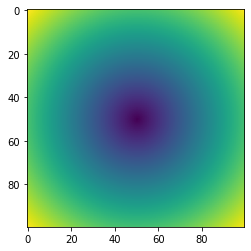

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.imshow(np.fromfunction(lambda x,y: ((x-50)**2+(y-50)**2)**0.5/100, (100,100)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  after removing the cwd from sys.path.


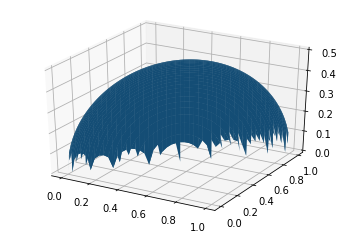

In [232]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(np.arange(100)/100, np.arange(100)/100, np.fromfunction(lambda x,y: (50**2 - (x-50)**2-(y-50)**2)**0.5/100, (100,100)))

In [ ]:
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


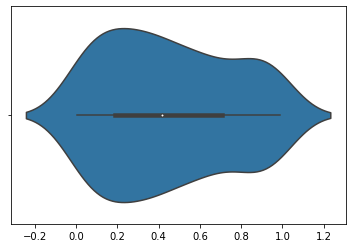

In [ ]:
sns.violinplot(np.random.random((10,10)))